In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



In [2]:
path = r'table_18_cleaned.csv'
df = pd.read_csv(path, index_col=0)
df = df.fillna(df.mean())
df = df.round(2)
df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1994,3.09,3.05,3.06,3.05,3.03,3.02,3.00,2.98,2.97,2.97,2.97,2.96
1995,2.91,2.89,2.88,2.87,2.86,2.84,2.82,2.79,2.75,2.74,2.74,2.74
1996,2.66,2.64,2.64,2.63,2.62,2.60,2.60,2.58,2.58,2.57,2.57,2.55
1997,2.52,2.51,2.50,2.50,2.49,2.47,2.46,2.45,2.44,2.43,2.41,2.40
1998,2.37,2.33,2.31,2.30,2.27,2.24,2.23,2.22,2.21,2.21,2.18,2.18


The Inflation Tale: How Peso Purchasing Power Change Every Year

In [3]:
melt_df = (df.reset_index().melt(id_vars=['Year'], var_name='Month', value_name='Peso Purchasing Power'))

melt_df.sample(5)

,Year,Month,Peso Purchasing Power
38,2000,Feb,2.02
95,2025,Mar,0.78
324,1998,Nov,2.18
251,2021,Aug,0.91
67,1997,Mar,2.50


In [21]:
# Area chart using Plotly Express
import plotly.express as px

fig = px.area(
    melt_df,
    x='Year',
    y='Peso Purchasing Power',
    color='Month',
    line_group='Month',
    labels={'Peso Purchasing Power': 'Peso Purchasing Power'},
    title='Peso Purchasing Power by Year and Month',
    template='plotly_white',
    height=500
)
fig.update_layout(legend_title_text='Month', legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1))
fig.update_yaxes(tickvals=None)  # sets the y-axis ticks to every 1 unit
fig.show()

In [5]:
fig.add_shape(
    type="rect",
    x0="2007", x1="2009",
    y0=0, y1=1,  # Will be updated below
    fillcolor="red",
    opacity=0.2,
    layer="below",
    line_width=0,
    yref="paper"  # This makes y0=0 (bottom), y1=1 (top) of the plot area
)

fig.add_shape(
    type="rect",
    x0="2020", x1="2023",
    y0=0, y1=1,  # Will be updated below
    fillcolor="blue",
    opacity=0.2,
    layer="below",
    line_width=0,
    yref="paper"  # This makes y0=0 (bottom), y1=1 (top) of the plot area
)


fig.add_annotation(
    x="2008",
    y=1,
    text="Global Recession",
    showarrow=False,
    font=dict(size=12, color="red"),
    yref="paper"
)

fig.add_annotation(
    x="2021",
    y=1,
    text="COVID-19 Pandemic",
    showarrow=False,
    font=dict(size=12, color="blue"),
    yref="paper"
)


In [6]:
rice = pd.read_excel("RicePriceHistory.xlsx")

rice

,Year,Rice Price
0,1994,5.90
1,1995,7.24
2,1996,8.13
3,1997,7.92
4,1998,8.30
5,1999,7.87
6,2000,8.42
7,2001,8.17
8,2002,8.82
9,2003,8.84


In [7]:
# Compare rice price to purchasing power table
print('Rice columns:', rice.columns)
print('Purchasing power table columns:', df.columns)

# Attempt to merge on 'Year' (adjust column names if needed)
merged = pd.merge(df.reset_index(), rice, on='Year', how='inner')
merged.head()


merged.to_csv('merged_output.csv', index=False)

Rice columns: Index(['Year', 'Rice Price'], dtype='object')
Purchasing power table columns: Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'],
      dtype='object')


In [8]:
fig.add_shape(
    type="rect",
    x0="2007", x1="2009",
    y0=0, y1=1,  # Will be updated below
    fillcolor="red",
    opacity=0.2,
    layer="below",
    line_width=0,
    yref="paper"  # This makes y0=0 (bottom), y1=1 (top) of the plot area
)

fig.add_shape(
    type="rect",
    x0="2020", x1="2023",
    y0=0, y1=1,  # Will be updated below
    fillcolor="blue",
    opacity=0.2,
    layer="below",
    line_width=0,
    yref="paper"  # This makes y0=0 (bottom), y1=1 (top) of the plot area
)


fig.add_annotation(
    x="2008",
    y=1,
    text="Global Recession",
    showarrow=False,
    font=dict(size=12, color="red"),
    yref="paper"
)

fig.add_annotation(
    x="2021",
    y=1,
    text="COVID-19 Pandemic",
    showarrow=False,
    font=dict(size=12, color="blue"),
    yref="paper"
)


fig.update_layout(
  title='Peso Purchasing Power',
  xaxis_title='Year',
  yaxis_title='Avg Purchasing Power',
  legend=dict(
      orientation='h',
      yanchor='bottom',
      y=-0.30,
      xanchor='center',
      x=0.5
  )
)




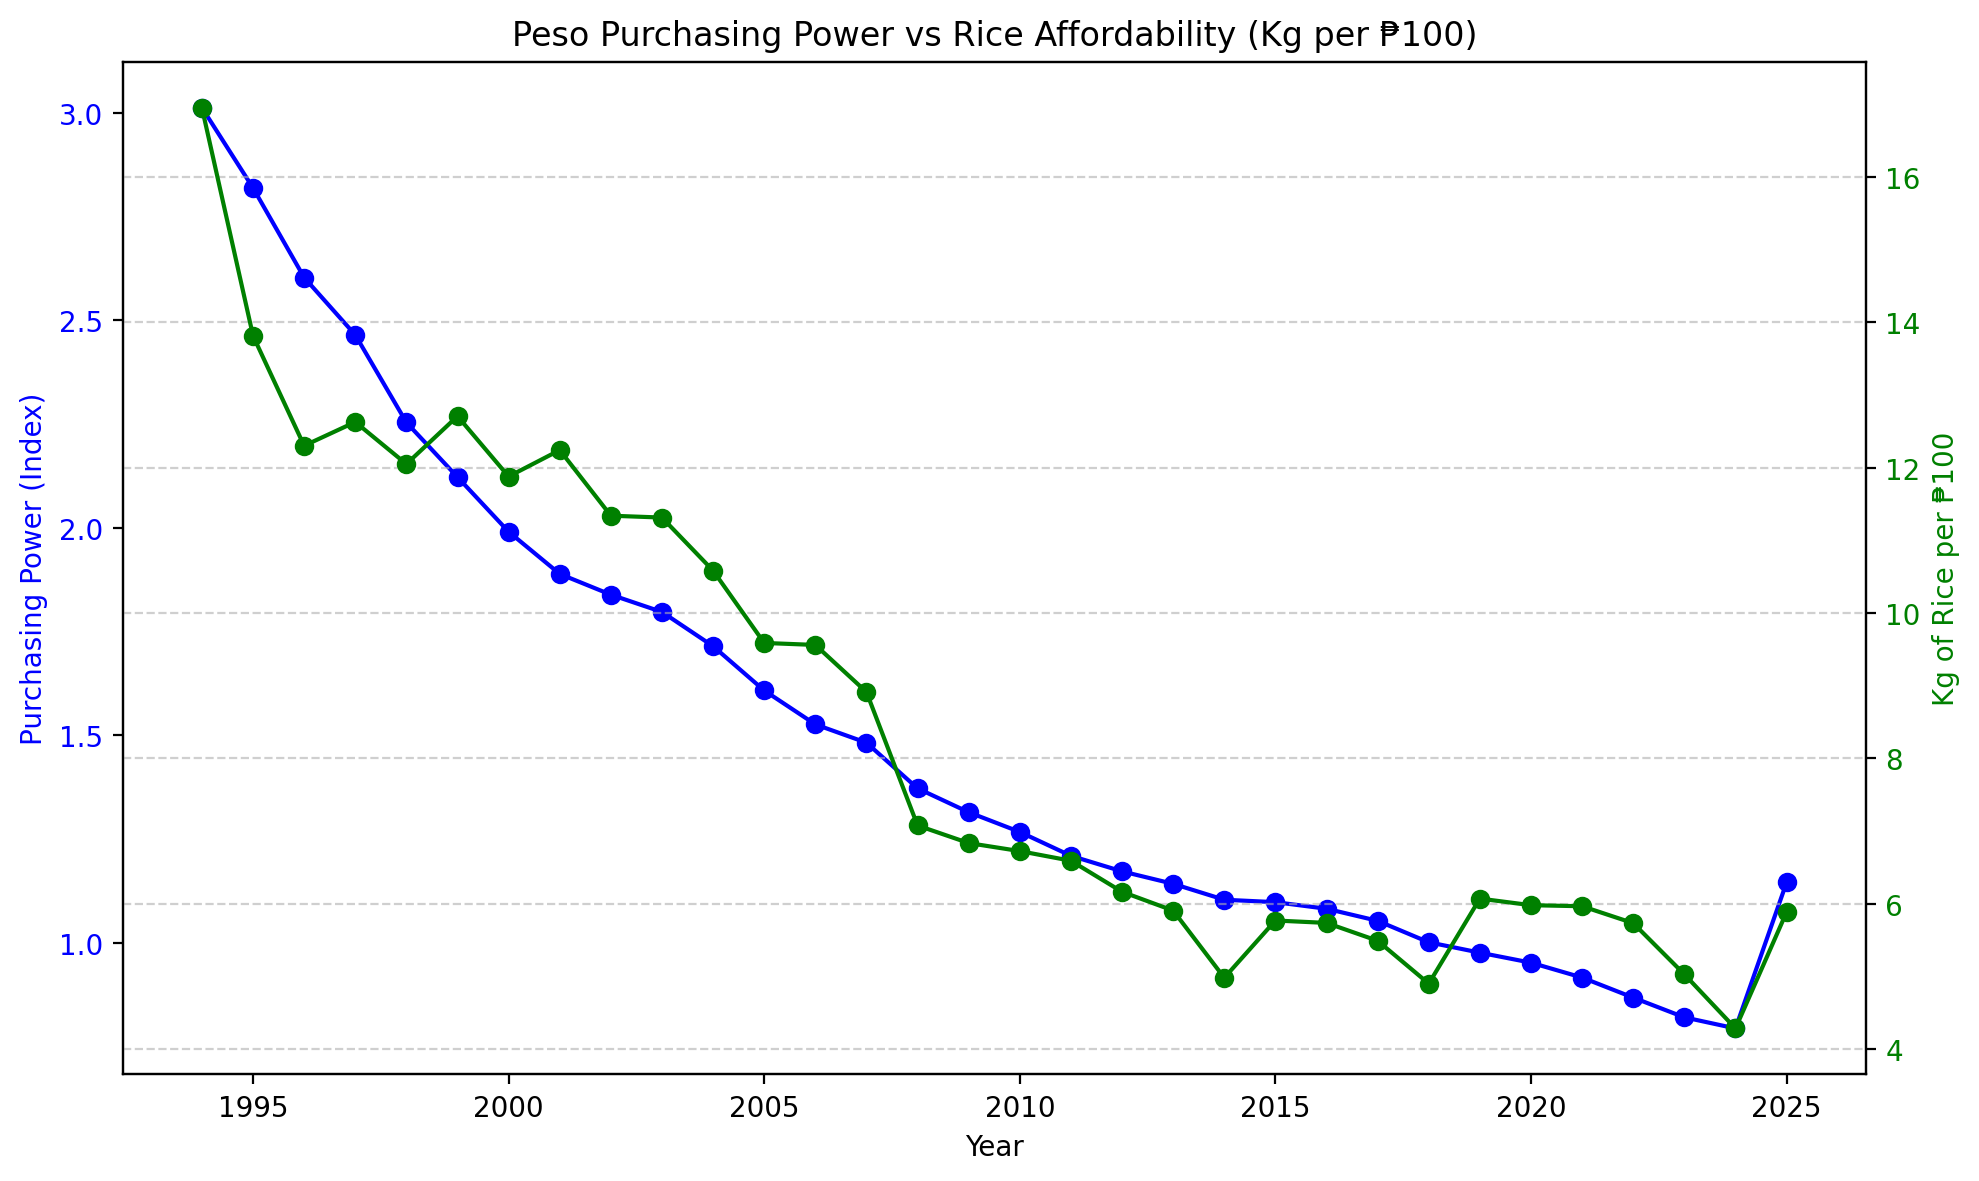

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV
df = pd.read_csv("merged_output.csv")

# Compute average purchasing power
df['Avg Purchasing Power'] = df[['Jan','Feb','Mar','Apr','May','Jun',
                                 'Jul','Aug','Sep','Oct','Nov','Dec']].mean(axis=1)

# Compute how many kg of rice ₱100 can buy
df['Kg Rice per 100PHP'] = 100 / df['Rice Price']

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Left y-axis (Purchasing Power)
ax1.set_xlabel('Year')
ax1.set_ylabel('Purchasing Power (Index)', color='blue')
ax1.plot(df['Year'], df['Avg Purchasing Power'], color='blue', marker='o')
ax1.tick_params(axis='y', labelcolor='blue')

# Right y-axis (Kg of Rice)
ax2 = ax1.twinx()
ax2.set_ylabel('Kg of Rice per ₱100', color='green')
ax2.plot(df['Year'], df['Kg Rice per 100PHP'], color='green', marker='o')
ax2.tick_params(axis='y', labelcolor='green')

# Title and grid
plt.title('Peso Purchasing Power vs Rice Affordability (Kg per ₱100)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
